In [4]:
import numpy as np
import pynbody
import pynbody.filt as filt
import pynbody.units as units
import pynbody.analysis.profile as profile
import matplotlib.pyplot as plt
import sys, os, glob, pickle, struct
import plot_tools
import make_plots

#entries = pickle.load(open("sorted_data_inc.p","rb"))

data_dir = "/scratch/hc2347/pickles/60/CENTER60"

pickle_files = glob.glob(data_dir+"*.p")

pickle_files.sort()

entry = plot_tools.load_halos_pickle(pickle_files[0])
entry["zred"] = 0.2

print(entry["mstar"], entry['nstar'])
ent

[4.78040341e+12 5.58209308e+12 4.05445253e+12 ... 1.00000000e-12
 1.00000000e-12 1.00000000e-12] [1.146851e+06 1.349783e+06 9.726390e+05 ... 1.000000e-12 1.000000e-12
 1.000000e-12]


/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


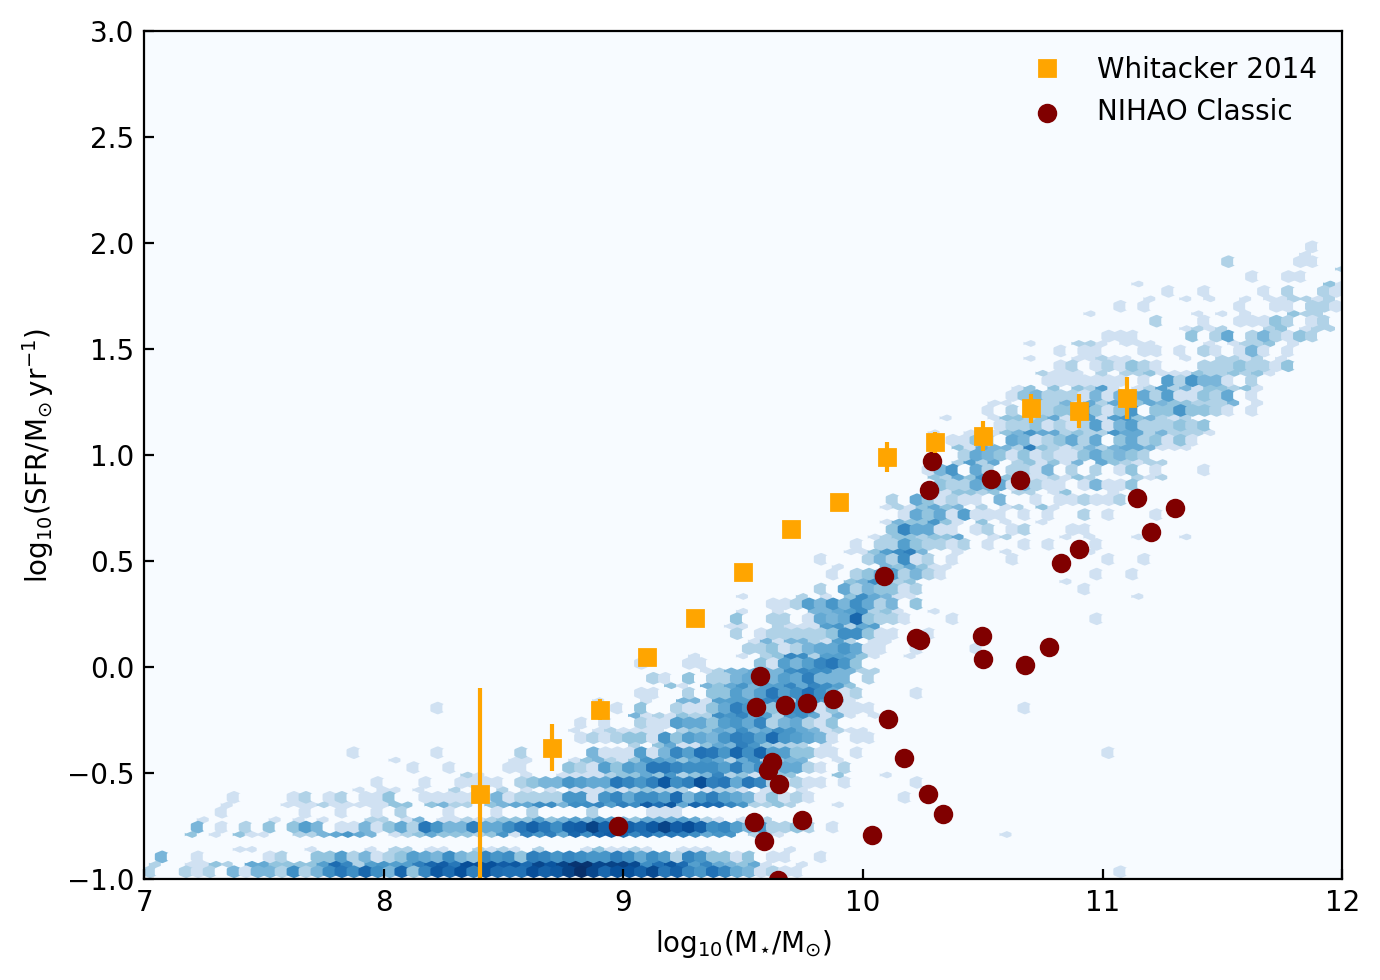

In [3]:
def salim(log_mstar):
    sfr = 5.96e-11*10**((-1.35 + 1)*(log_mstar - 11.03))*np.exp(-10**(log_mstar - 11.03))
    return sfr
whitacker = np.genfromtxt('/scratch/hc2347/main/visualization/obs/Whitacker_2014_SMF_z0.5.csv',unpack=True,skip_header=1,delimiter=',')

xlabel = '$\\rm{log_{10}}(M_{\star}/\\rm M_{\odot})$'
ylabel = '$\\rm{log_{10}(SFR/M_{\odot}\,yr^{-1})}$'

fig, ax = plt.subplots(figsize=(7,5), dpi = 200)

xmin = 7
xmax = 12
ymin = -1
ymax = 3

x = np.log10(np.array(entry["mstar"]))
y = np.log10(np.array(entry["sfr_100"]))
#x, y = plot_tools.do_filter(x,y)
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

ax.hexbin(x, y,  gridsize = 100, bins = 'log', cmap = 'Blues',extent=[xmin, xmax, ymin, ymax])

nihao_x = plot_tools.nihao('mstar',0)
nihao_y = plot_tools.nihao('sfr_100',0)
ax.scatter(np.log10(nihao_x), np.log10(nihao_y), color='maroon', label="NIHAO Classic")
#ax.plot(x,np.log10(salim(x)))
ax.plot(whitacker[0], whitacker[1], marker='s', linestyle='none', color = 'orange', label='Whitacker 2014')
ax.errorbar(whitacker[0], whitacker[1], yerr = whitacker[2], fmt='none', color = 'orange')
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.tick_params(direction='in', which='both')
ax.legend(frameon=False)
plt.tight_layout()

plt.savefig('/scratch/hc2347/reports/60/sfr_100_v1.png')

In [ ]:
artefacts: put a gas particle filter